In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [53]:
# Output the final results
df_spoken = pd.read_csv('data/slavic_audio_experiment_cleaned.csv')
len(df_spoken)

5804

In [78]:
max(df_spoken['age'].to_list())

59

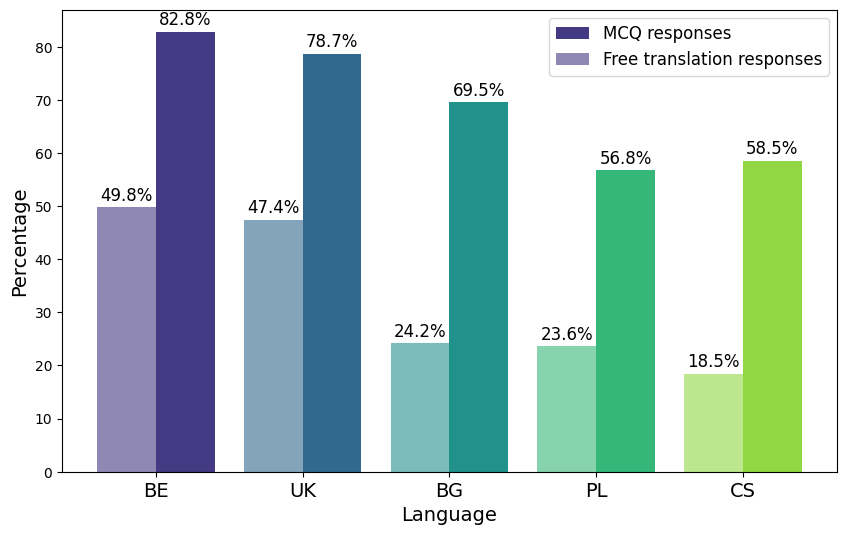

In [80]:
# Function to plot MCQ and Free responses for each language
def plot_responses(ax, df, response_type, unique_languages, title):
    colors = sns.color_palette("viridis", n_colors=len(unique_languages))
    
    for i, lang in enumerate(unique_languages):
        filtered_df = df[df['source_language'] == lang]
        mcq_percent = filtered_df[f'user_{response_type}_translation'].eq(filtered_df['correct_translation']).mean() * 100
        free_percent = filtered_df['is_correct'].mean() * 100
        
        # Plot MCQ responses
        ax.bar(i + 0.2, mcq_percent, width=0.4, color=colors[i], label=f'{lang} (MCQ)')
        
        # Plot Free responses 
        ax.bar(i - 0.2, free_percent, width=0.4, color=colors[i], alpha=0.6, label=f'{lang} (Free)')
        
        # Add percentage numbers on top of each bar
        ax.text(i + 0.2, mcq_percent + 0.5, f'{mcq_percent:.1f}%', ha='center', va='bottom', size = 12)
        ax.text(i - 0.2, free_percent + 0.5, f'{free_percent:.1f}%', ha='center', va='bottom', size = 12)

    # Set plot details
    #ax.set_title(title)
    ax.set_xlabel('Language', size=14)
    ax.set_ylabel('Percentage', size=14)
    ax.set_xticks(range(len(unique_languages)))
    ax.set_xticklabels(unique_languages, size=14)
    ax.tick_params(axis='x')
    ax.legend(["MCQ responses", "Free translation responses"], fontsize="12")

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define unique languages
unique_languages_spoken = ['BE', 'UK', 'BG', 'PL', 'CS']

# Plot for df_spoken
plot_responses(ax, df_spoken, 'mcq', unique_languages_spoken, 'Correct MCQ and Free Translation Responses')

# Save the plot to a file (optional)
plt.savefig('results/experiment_results.pdf', format='pdf')

# Show the plot
plt.show()


In [43]:
# Save results for each items for correlation
# Group by 'Language' and 'source_text_to_be_translated' and calculate the average for numeric columns
# Calculate accuracy_mcq and accuracy_free
# Calculate accuracy_mcq and accuracy_free for each row
df = df_spoken
df['accuracy_mcq'] = df_spoken.apply(lambda row: (row['user_mcq_translation'] == row['correct_translation']) * 100, axis=1)
df['accuracy_free'] = df.groupby('source_text_to_be_translated')['is_correct'].transform('mean') * 100

# Group by 'source_language' and 'source_text_to_be_translated' and calculate the average for numeric columns
avg_results = df.groupby(['source_language', 'source_text_to_be_translated']).mean()
# Save the result to CSV files for each language
languages = avg_results.index.get_level_values('source_language').unique()

for language in languages:
    language_df = avg_results.loc[language]
    print(language_df.columns)
    language_df = language_df[['user_free_translation_time_taken',	'user_mcq_translation_time_taken','accuracy_mcq',	'accuracy_free']]
    file_name = f"results/intelligibility/{language}_average_results.csv"
    language_df.to_csv(file_name)

    print(f"Saved average results for {language} to {file_name}")

Index(['age', 'question_number', 'user_free_translation_time_taken',
       'user_mcq_translation_time_taken', 'is_correct', 'accuracy_mcq',
       'accuracy_free'],
      dtype='object')
Saved average results for BE to results/intelligibility/BE_average_results.csv
Index(['age', 'question_number', 'user_free_translation_time_taken',
       'user_mcq_translation_time_taken', 'is_correct', 'accuracy_mcq',
       'accuracy_free'],
      dtype='object')
Saved average results for BG to results/intelligibility/BG_average_results.csv
Index(['age', 'question_number', 'user_free_translation_time_taken',
       'user_mcq_translation_time_taken', 'is_correct', 'accuracy_mcq',
       'accuracy_free'],
      dtype='object')
Saved average results for CS to results/intelligibility/CS_average_results.csv
Index(['age', 'question_number', 'user_free_translation_time_taken',
       'user_mcq_translation_time_taken', 'is_correct', 'accuracy_mcq',
       'accuracy_free'],
      dtype='object')
Saved avera

/var/folders/s6/6r_4f6n16dv6s41vfjb0rqzc0000gn/T/ipykernel_5507/469768326.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_results = df.groupby(['source_language', 'source_text_to_be_translated']).mean()


In [56]:
# Save results for each items for correlation
# Group by 'Language' and 'source_text_to_be_translated' and calculate the average for numeric columns
# Calculate accuracy_mcq and accuracy_free
# Calculate accuracy_mcq and accuracy_free for each row
df = df_spoken
df['accuracy_mcq'] = df_spoken.apply(lambda row: (row['user_mcq_translation'] == row['correct_translation']) * 100, axis=1)
df['accuracy_free'] = df.groupby('source_text_to_be_translated')['is_correct'].transform('mean') * 100

# Group by 'source_language' and 'source_text_to_be_translated' and calculate the average for numeric columns
avg_results = df.groupby(['source_text_to_be_translated']).mean()
# Save the result to CSV files for each language

language_df = avg_results[['user_free_translation_time_taken',	'user_mcq_translation_time_taken','accuracy_mcq',	'accuracy_free']]
file_name = f"results/intelligibility/all_average_results.csv"
language_df.to_csv(file_name)

print(f"Saved average results for {language} to {file_name}")

Saved average results for UK to results/intelligibility/all_average_results.csv


/var/folders/s6/6r_4f6n16dv6s41vfjb0rqzc0000gn/T/ipykernel_5507/2930715941.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_results = df.groupby(['source_text_to_be_translated']).mean()


In [49]:
df_correct = df[df['is_correct'] == 1]
avg_results_correct = df_correct.groupby(['source_language', 'source_text_to_be_translated']).mean()

/var/folders/s6/6r_4f6n16dv6s41vfjb0rqzc0000gn/T/ipykernel_5507/2819634771.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_results_correct = df_correct.groupby(['source_language', 'source_text_to_be_translated']).mean()


In [51]:
for language in languages:
    language_df_correct = avg_results_correct.loc[language]
    language_df_correct = language_df_correct[['user_free_translation_time_taken',	'user_mcq_translation_time_taken','accuracy_mcq',	'accuracy_free']]
    file_name = f"results/intelligibility/{language}_average_results_correct.csv"
    language_df_correct.to_csv(file_name)